In [26]:
import pandas as pd

In [27]:
df = pd.read_csv('BBDD_Scoring_con_scoring.csv')
df_predicciones_macro = pd.read_csv('predicciones_macro.csv')
df.head()

,Dias_impago_descubierto_year,Dias_impago_hip_year,Indicador_recibos,Indicador_tarjeta,Mora_ult5A,Recibos_denegados_dummy,Edad,Sal_BurCto_Year,default,scoring
0,0.0,0.0,1.0,0.0,0.0,0,70.42,0.0,0.0,0.244090
1,0.0,0.0,1.0,0.0,0.0,0,44.28,0.0,0.0,0.238282
2,5.0,0.0,1.0,1.0,0.0,0,46.70,0.0,0.0,0.195427
3,4.0,0.0,1.0,1.0,0.0,0,68.19,0.0,0.0,0.189373
4,0.0,0.0,0.0,0.0,0.0,0,55.43,0.0,0.0,0.402047


Clustering de datos con KMeans

c:\Users\unaim\Anaconda3\envs\unaimleal\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


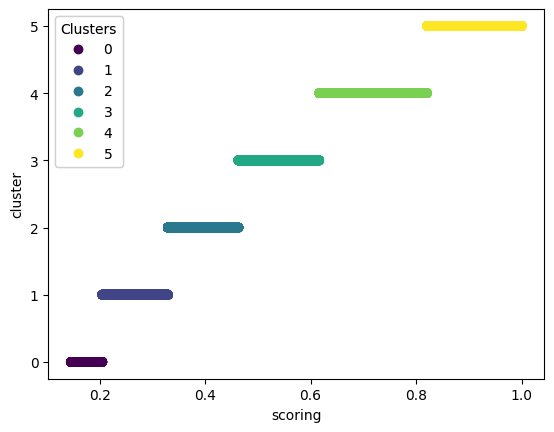

1    0.340079
2    0.291513
0    0.274210
3    0.048831
4    0.024508
5    0.020859
Name: cluster, dtype: float64

In [28]:
# Clustering con todas las variables
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df.drop('default', axis=1)
kmeans = KMeans(n_clusters=6, random_state=0).fit(df['scoring'].values.reshape(-1, 1))# df['scoring'].values.reshape(-1, 1)
df['cluster'] = kmeans.labels_

cluster_means = df.groupby('cluster')['scoring'].mean().sort_values() 

# Crear un diccionario para mapear los clusters originales a los nuevos clusters ordenados
cluster_order = {old: new for new, old in enumerate(cluster_means.index)} 

# Reasignar los clusters 
df['cluster'] = df['cluster'].map(cluster_order) 

# Visualización 
fig, ax = plt.subplots() 
scatter = ax.scatter(df['scoring'], df['cluster'], c=df['cluster']) 
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters") 
ax.xaxis.set_label_text('scoring')
ax.yaxis.set_label_text('cluster')
ax.add_artist(legend1) 
plt.show() 

display(df['cluster'].value_counts(normalize=True))

c:\Users\unaim\Anaconda3\envs\unaimleal\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\unaim\Anaconda3\envs\unaimleal\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\unaim\Anaconda3\envs\unaimleal\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\unaim\Anaconda3\envs\unaimleal\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

,k,max_mean,min_mean,within_var,size_var
0,4,0.020000,0.000384,0.005397,1.215696e+09
1,5,0.027168,0.000376,0.006536,1.373825e+09
2,6,0.032866,0.000377,0.007660,1.400854e+09
3,7,0.033550,0.000364,0.006761,8.083903e+08
4,8,0.038139,0.000364,0.007258,7.850183e+08
5,9,0.043106,0.000364,0.007878,7.773892e+08
6,10,0.042655,0.000288,0.007151,6.993723e+08
7,11,0.045496,0.000288,0.007077,6.492528e+08
8,12,0.045099,0.000289,0.006522,5.657095e+08


c:\Users\unaim\Anaconda3\envs\unaimleal\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


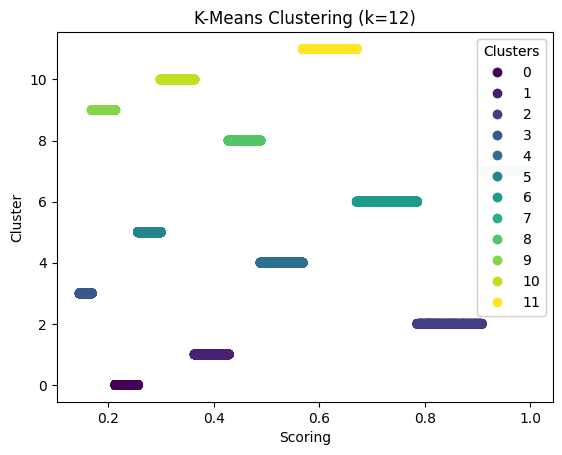

Métricas para k óptimo:
k             1.200000e+01
max_mean      4.509922e-02
min_mean      2.886086e-04
within_var    6.521975e-03
size_var      5.657095e+08
score        -5.657095e+08
Name: 8, dtype: float64


In [29]:
k_values = range(4, 13)  # Rango de valores de k
cluster_metrics = []
df_mejor_cluster = df.copy()
df_mejor_cluster = df_mejor_cluster.drop('cluster', axis=1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_mejor_cluster['scoring'].values.reshape(-1, 1))
    df_mejor_cluster['cluster'] = kmeans.labels_

    # Calcular la media de default por clúster
    cluster_means = df_mejor_cluster.groupby('cluster')['default'].mean()

    # Calcular dispersión dentro de clústeres
    within_cluster_var = df_mejor_cluster.groupby('cluster')['default'].var().mean()

    # Calcular el tamaño de cada cluster
    cluster_sizes = df_mejor_cluster['cluster'].value_counts()
    size_variance = cluster_sizes.var()

    # Guardar métricas
    cluster_metrics.append({
        'k': k,
        'max_mean': cluster_means.max(),
        'min_mean': cluster_means.min(),
        'within_var': within_cluster_var,
        'size_var': size_variance
    })

# Convertir las métricas en un DataFrame
metrics_df = pd.DataFrame(cluster_metrics)
display(metrics_df)

# Seleccionar el valor óptimo de k considerando varianza de tamaños
metrics_df['score'] = metrics_df['max_mean'] - metrics_df['min_mean'] - metrics_df['within_var'] - metrics_df['size_var']
optimal_k_row = metrics_df.loc[metrics_df['score'].idxmax()]
optimal_k = int(optimal_k_row['k'])

# Ajustar el modelo con k óptimo
kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(df_mejor_cluster['scoring'].values.reshape(-1, 1))
df_mejor_cluster['cluster'] = kmeans.labels_

# Visualización
fig, ax = plt.subplots()
scatter = ax.scatter(df_mejor_cluster['scoring'], df_mejor_cluster['cluster'], c=df_mejor_cluster['cluster'], cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.xlabel('Scoring')
plt.ylabel('Cluster')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.show()

# Mostrar las métricas de k óptimo
print("Métricas para k óptimo:")
print(optimal_k_row)


In [30]:
for col in df_mejor_cluster.columns:
    if col != 'cluster':
        print(f"Variable: {col}")
        display(df_mejor_cluster.groupby('cluster')[col].mean())

Variable: Dias_impago_descubierto_year


cluster
0      0.391757
1      0.421430
2     22.046743
3      0.106806
4      6.339859
5      0.653352
6     16.034707
7     44.909802
8      3.770128
9      3.770105
10     5.190851
11    11.362627
Name: Dias_impago_descubierto_year, dtype: float64

Variable: Dias_impago_hip_year


cluster
0      0.036435
1      0.105405
2     13.238130
3      0.007543
4      2.120340
5      0.092037
6      7.573288
7     38.086290
8      1.310272
9      0.231223
10     0.654897
11     4.146772
Name: Dias_impago_hip_year, dtype: float64

Variable: Indicador_recibos


cluster
0     1.000000
1     0.026363
2     0.154214
3     1.000000
4     0.122499
5     0.169586
6     0.172606
7     0.173482
8     0.106274
9     1.000000
10    0.597938
11    0.161495
Name: Indicador_recibos, dtype: float64

Variable: Indicador_tarjeta


cluster
0     0.052519
1     0.024569
2     0.096798
3     1.000000
4     0.079747
5     0.853012
6     0.096684
7     0.102526
8     0.072848
9     1.000000
10    0.488660
11    0.096263
Name: Indicador_tarjeta, dtype: float64

Variable: Mora_ult5A


cluster
0     0.005071
1     0.003825
2     0.139492
3     0.000000
4     0.153591
5     0.001126
6     0.104121
7     0.321106
8     0.007107
9     0.002804
10    0.043170
11    0.085391
Name: Mora_ult5A, dtype: float64

Variable: Recibos_denegados_dummy


cluster
0     0.004714
1     0.008420
2     0.225985
3     0.000000
4     0.113286
5     0.017086
6     0.219709
7     0.210764
8     0.099833
9     0.045153
10    0.083892
11    0.174405
Name: Recibos_denegados_dummy, dtype: float64

Variable: Edad


cluster
0     47.672781
1     48.772166
2     49.950298
3     45.326647
4     48.878120
5     44.829604
6     50.079864
7     49.735872
8     48.479862
9     45.830735
10    46.449845
11    49.131096
Name: Edad, dtype: float64

Variable: Sal_BurCto_Year


cluster
0       13.237133
1       31.747187
2     1149.555451
3        3.477473
4      416.947990
5       19.481907
6      797.678736
7     4992.212940
8      276.100486
9       34.111757
10      70.169468
11     858.591735
Name: Sal_BurCto_Year, dtype: float64

Variable: default


cluster
0     0.000380
1     0.000724
2     0.011778
3     0.000385
4     0.003455
5     0.000289
6     0.010536
7     0.045099
8     0.002443
9     0.000590
10    0.001031
11    0.003851
Name: default, dtype: float64

Variable: scoring


cluster
0     0.239142
1     0.400837
2     0.844793
3     0.150025
4     0.521017
5     0.272732
6     0.725480
7     0.971261
8     0.454581
9     0.186915
10    0.325704
11    0.615249
Name: scoring, dtype: float64

### **3. Calibración de la PD**

3.1 Calcular el DR de cada bucket

In [31]:
# DR por cluster
print("DR por cluster:")
display(df.groupby('cluster')['default'].mean())

DR por cluster:


cluster
0    0.000409
1    0.000377
2    0.000784
3    0.003695
4    0.008997
5    0.032866
Name: default, dtype: float64

3.2 Ajustar las PD por bucket usando la fórmula de Bayes

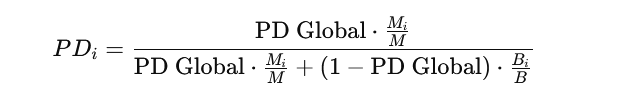

In [32]:
df_predicciones_macro

,FECHA,Paro,PIB,Precio_vivienda,Mora_Adq_Vivienda,Predicciones,Conf_int_lower,Conf_int_upper
0,2021-09-30,0.145786,105.201662,1657.860334,0.029578,0.003447,0.002784,0.004110
1,2021-12-31,0.139232,106.884889,1666.566146,0.028849,0.003446,0.002459,0.004433
2,2022-03-31,0.132973,107.953737,1675.262287,0.028419,0.003416,0.002167,0.004666
3,2022-06-30,0.126995,109.033275,1684.003804,0.028275,0.003384,0.001909,0.004859
4,2022-09-30,0.121286,109.905541,1692.790935,0.028413,0.003339,0.001664,0.005014
5,2022-12-31,0.118560,110.564974,1701.623917,0.028838,0.003281,0.001426,0.005136
6,2023-03-31,0.119746,111.007234,1713.684554,0.029562,0.003178,0.001158,0.005198
7,2023-06-30,0.120344,111.673278,1725.830673,0.030606,0.003081,0.000907,0.005254
8,2023-09-30,0.120645,112.566664,1738.062881,0.032005,0.002988,0.000671,0.005304
9,2023-12-31,0.120796,113.692330,1750.381787,0.033802,0.002899,0.000448,0.005350


In [42]:
for trimestre in df_predicciones_macro.index:
    for cluster in df['cluster'].unique():
        media_scoring = df.loc[df['cluster'] == cluster, 'scoring'].mean()
        pd_global = df_predicciones_macro.loc[trimestre, 'Predicciones']
        df_predicciones_macro.loc[trimestre, f'cluster_{cluster}'] = pd_global * media_scoring / (pd_global * media_scoring + (1 - pd_global) * (1 - media_scoring))

In [43]:
df_predicciones_macro

,FECHA,Paro,PIB,Precio_vivienda,Mora_Adq_Vivienda,Predicciones,Conf_int_lower,Conf_int_upper,cluster_1,cluster_0,cluster_2,cluster_3,cluster_4,cluster_5
0,2021-09-30,0.145786,105.201662,1657.860334,0.029578,0.003447,0.002784,0.004110,0.001193,0.000625,0.002322,0.003795,0.008325,0.045428
1,2021-12-31,0.139232,106.884889,1666.566146,0.028849,0.003446,0.002459,0.004433,0.001193,0.000625,0.002321,0.003794,0.008322,0.045414
2,2022-03-31,0.132973,107.953737,1675.262287,0.028419,0.003416,0.002167,0.004666,0.001183,0.000619,0.002301,0.003761,0.008251,0.045042
3,2022-06-30,0.126995,109.033275,1684.003804,0.028275,0.003384,0.001909,0.004859,0.001172,0.000613,0.002279,0.003726,0.008173,0.044632
4,2022-09-30,0.121286,109.905541,1692.790935,0.028413,0.003339,0.001664,0.005014,0.001156,0.000605,0.002249,0.003676,0.008066,0.044067
5,2022-12-31,0.118560,110.564974,1701.623917,0.028838,0.003281,0.001426,0.005136,0.001136,0.000595,0.002210,0.003612,0.007925,0.043326
6,2023-03-31,0.119746,111.007234,1713.684554,0.029562,0.003178,0.001158,0.005198,0.001100,0.000576,0.002140,0.003499,0.007679,0.042025
7,2023-06-30,0.120344,111.673278,1725.830673,0.030606,0.003081,0.000907,0.005254,0.001066,0.000558,0.002075,0.003392,0.007444,0.040785
8,2023-09-30,0.120645,112.566664,1738.062881,0.032005,0.002988,0.000671,0.005304,0.001034,0.000541,0.002012,0.003290,0.007221,0.039600
9,2023-12-31,0.120796,113.692330,1750.381787,0.033802,0.002899,0.000448,0.005350,0.001003,0.000525,0.001952,0.003192,0.007007,0.038466


In [48]:
for trimestre in df_predicciones_macro.index:
    pd_media_ponderada = 0
    for columna_cluster in df_predicciones_macro.columns[8:]:
        cantidad_del_cluster = df['cluster'].value_counts(normalize=True).loc[int(columna_cluster.split('_')[1])]
        print(cantidad_del_cluster, df_predicciones_macro.loc[trimestre, columna_cluster])
        pd_media_ponderada += df_predicciones_macro.loc[trimestre, columna_cluster] * cantidad_del_cluster
    
    print(f"Predicción de default para el trimestre {trimestre}: {df_predicciones_macro.loc[trimestre, 'Predicciones']}")
    print(f"Predicción de default ponderada: {pd_media_ponderada}")


0.3400792998520645 0.0011934210933606422
0.2742099080715062 0.0006248571133937845
0.2915131518283467 0.0023215900088416667
0.0488307481367742 0.0037948951792311208
0.02450758319869464 0.008324779724600153
0.020859308912613807 0.045428381997058426
Predicción de default para el trimestre 0: 0.0034467328815973
Predicción de default ponderada: 0.002590906298101746
0.3400792998520645 0.0011930136907022913
0.2742099080715062 0.0006246436821812836
0.2915131518283467 0.0023207983737776696
0.0488307481367742 0.0037936030745849606
0.02450758319869464 0.008321958146828642
0.020859308912613807 0.0454135605329348
Predicción de default para el trimestre 1: 0.0034455589109628
Predicción de default ponderada: 0.002590037041917951
0.3400792998520645 0.0011828067094917568
0.2742099080715062 0.0006192964481815112
0.2915131518283467 0.0023009647147849126
0.0488307481367742 0.003761230204407787
0.02450758319869464 0.00825126243660882
0.020859308912613807 0.045042080336984314
Predicción de default para el t

In [45]:
df['scoring'].mean()

0.30894445132807313